# Libraries and options

Import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import hinge_loss
from sklearn.metrics import jaccard_score
from sklearn.metrics import make_scorer
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('precision', 2)

# Data import

Read training data

In [2]:
T = pd.read_csv('train.csv', index_col=0)

Read scoring data

In [3]:
S = pd.read_csv('test.csv', index_col=0)

# Data exploration

Get the number of rows and columns of `train.csv` and `test.csv`

In [4]:
print('train.csv has', T.shape[0],'rows and', T.shape[1], 'columns')
print('test.csv has', S.shape[0],'rows and', S.shape[1], 'columns')

train.csv has 891 rows and 11 columns
test.csv has 418 rows and 10 columns


|Dataset  |Rows    |Percent |
|---------|-------:|-------:|
|train.csv|891     |68%     |
|test.csv |418     |32%     |
|**Total**|**1309**|**100%**|

Print variable names for `train.csv` and `test.csv`

In [5]:
T.columns.tolist()

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [6]:
S.columns.tolist()

['Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

`Survived` is not present in `test.csv` as it is the target variable

Display the first 5 rows of `train.csv`

In [7]:
T.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


Display the last 5 rows of `train.csv`

In [8]:
T.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Display the first 5 rows of `test.csv`

In [9]:
S.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.83,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.00,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.69,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.66,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.29,NaN,S


Get the non-null count and data type for each variable

In [10]:
T.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
S.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


Count the number of null values for each variable in `train.csv` and `test.csv`

In [12]:
T.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
S.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

Count the percent of null values for each variable in `train.csv` and `test.csv`

In [14]:
np.round(T.isnull().sum() * 100 / T.shape[0], 2)

Survived     0.00
Pclass       0.00
Name         0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Ticket       0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
dtype: float64

In the **training** dataset:  
  
- 20% of `Age` values are missing  
- 77% of `Cabin` values are missing
- `Embarked` has 2 missing values (0.22%)

In [15]:
np.round(S.isnull().sum() * 100 / S.shape[0], 2)

Pclass       0.00
Name         0.00
Sex          0.00
Age         20.57
SibSp        0.00
Parch        0.00
Ticket       0.00
Fare         0.24
Cabin       78.23
Embarked     0.00
dtype: float64

In the **scoring** dataset:  
  
- 21% of `Age` values are missing
- `Fare` has 1 missing value (0.24%)
- 78% of `Cabin` values are missing
- `Embarked` has no missing values

Count the unique values for each variable in `train.csv` and `test.csv`

In [16]:
T.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [17]:
S.nunique()

Pclass        3
Name        418
Sex           2
Age          79
SibSp         7
Parch         8
Ticket      363
Fare        169
Cabin        76
Embarked      3
dtype: int64

Get the unique values of `Parch` in `train.csv` and `test.csv`

In [18]:
np.sort(T['Parch'].unique()).tolist()

[0, 1, 2, 3, 4, 5, 6]

In [19]:
np.sort(S['Parch'].unique()).tolist()

[0, 1, 2, 3, 4, 5, 6, 9]

# Exploratory data analysis

Scatterplot of `Fare` and `Age` in `train.csv`

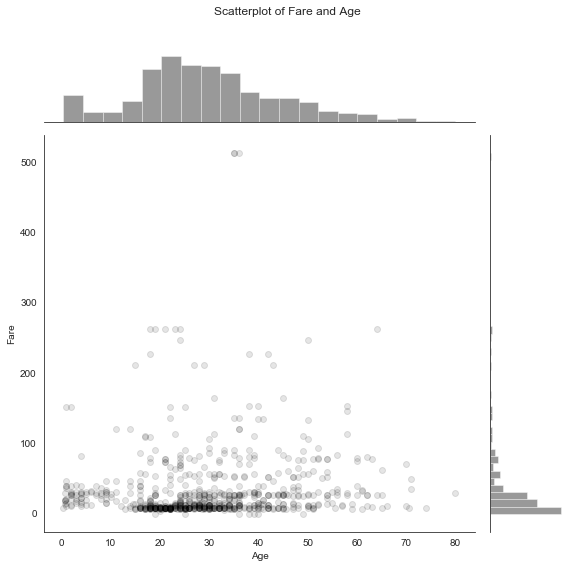

In [20]:
sns.set_style('white')
g = sns.jointplot(x='Age', y='Fare', data=T, color='black', alpha=0.1, height=8, marginal_kws={'kde':False})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatterplot of Fare and Age')
plt.show()

In [21]:
pd.set_option('precision', 3)

Correlation between `Age` and `Fare`

In [22]:
T['Age'].corr(T['Fare']).round(3)

0.096

`Age` and `Fare` are not correlated

In [23]:
pd.set_option('precision', 2)

Exploration of `Survived`

In [24]:
T['Survived'].value_counts(normalize=True, dropna=False)

0    0.62
1    0.38
Name: Survived, dtype: float64

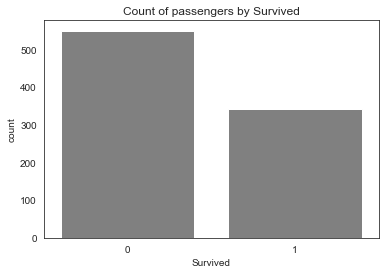

In [25]:
plt.figure(figsize=(6,4))
g = sns.countplot(T['Survived'], color='grey').set_title('Count of passengers by Survived')

Exploration if `Pclass`

In [26]:
T['Pclass'].value_counts(normalize=True, dropna=False).sort_index()

1    0.24
2    0.21
3    0.55
Name: Pclass, dtype: float64

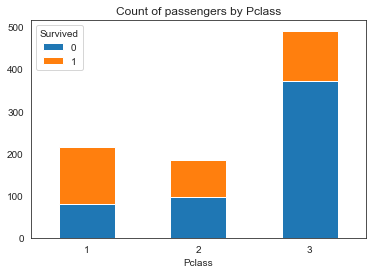

In [27]:
g = T.groupby('Pclass')['Survived'].value_counts(dropna=False).unstack().fillna(0).plot(kind='bar', rot=0, stacked=True, legend=True, figsize=(6, 4), title='Count of passengers by Pclass')

In [28]:
pd.crosstab(index=T['Pclass'], columns=T['Survived'], margins=True, normalize='index')

Survived,0,1
Pclass,,
1,0.37,0.63
2,0.53,0.47
3,0.76,0.24
All,0.62,0.38


Passengers having `Pclass` = 1 are more likely to survive

Exploration of `Sex`

In [29]:
T['Sex'].value_counts(normalize=True, dropna=False).sort_index()

female    0.35
male      0.65
Name: Sex, dtype: float64

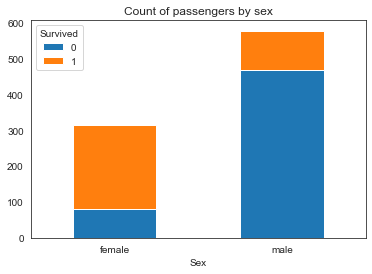

In [30]:
g = T.groupby('Sex')['Survived'].value_counts(dropna=False).unstack().fillna(0).plot(kind='bar', rot=0, stacked=True, legend=True, figsize=(6, 4), title='Count of passengers by sex')

In [31]:
pd.crosstab(index=T['Sex'], columns=T['Survived'], margins=True, normalize='index')

Survived,0,1
Sex,,
female,0.26,0.74
male,0.81,0.19
All,0.62,0.38


Female passengers are more likely to survive

Exploration of `Embarked`

In [32]:
pd.set_option('precision', 3)

In [33]:
T['Embarked'].value_counts(normalize=True, dropna=False).sort_index()

C      0.189
Q      0.086
S      0.723
NaN    0.002
Name: Embarked, dtype: float64

In [34]:
pd.set_option('precision', 2)

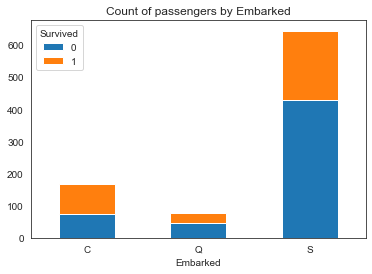

In [35]:
g = T.groupby('Embarked')['Survived'].value_counts(dropna=False).unstack().fillna(0).plot(kind='bar', rot=0, stacked=True, figsize=(6, 4), legend=True, title='Count of passengers by Embarked')

In [36]:
pd.crosstab(index=T['Embarked'], columns=T['Survived'], margins=True, normalize='index', dropna=False)

Survived,0,1
Embarked,,
C,0.45,0.55
Q,0.61,0.39
S,0.66,0.34
All,0.62,0.38


Passengers who embarked at Cherbourg are more likely to survive

Descriptive statistics of `Age`, `Fare`, `SibSp`, `Parch`

In [37]:
T[['Age', 'Fare', 'SibSp', 'Parch']].describe()

,Age,Fare,SibSp,Parch
count,714.00,891.00,891.00,891.00
mean,29.70,32.20,0.52,0.38
std,14.53,49.69,1.10,0.81
min,0.42,0.00,0.00,0.00
25%,20.12,7.91,0.00,0.00
50%,28.00,14.45,0.00,0.00
75%,38.00,31.00,1.00,0.00
max,80.00,512.33,8.00,6.00


Mean of `Age`, `Fare`, `SibSp`, `Parch` by `Survived`

In [38]:
T.groupby('Survived')[['Age', 'Fare', 'SibSp', 'Parch']].mean()

,Age,Fare,SibSp,Parch
Survived,,,,
0,30.63,22.12,0.55,0.33
1,28.34,48.40,0.47,0.46


- Younger passengers are more likely to survive. 
- Passengers with expensive fare are more likely to survive. 
- Passengers having parents or children are more likely to survive. 

Exploration of `Age`

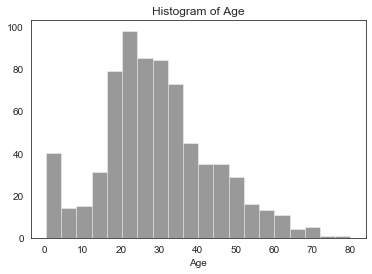

In [39]:
plt.figure(figsize=(6,4))
g = sns.distplot(T['Age'], kde=False, color='black').set_title('Histogram of Age')

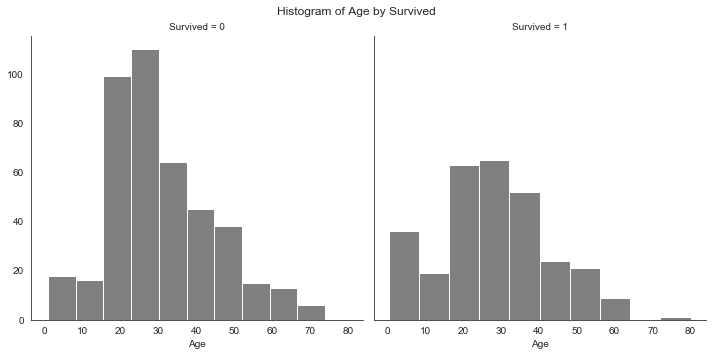

In [40]:
g = sns.FacetGrid(T, col='Survived', col_order=[0, 1], height=5, aspect=1)
g.map(plt.hist, 'Age', color='grey')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Histogram of Age by Survived')
plt.show()

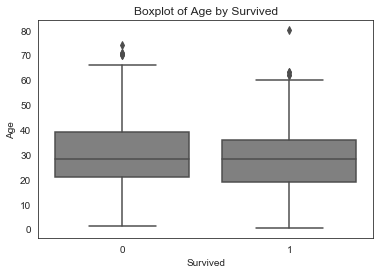

In [41]:
plt.figure(figsize=(6,4))
g = sns.boxplot(x='Survived', y='Age', data=T, color='grey').set_title('Boxplot of Age by Survived')

Exploration of `Fare`

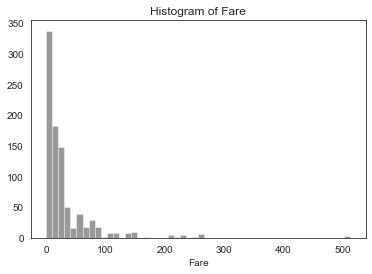

In [42]:
plt.figure(figsize=(6,4))
g = sns.distplot(T['Fare'], kde=False, color='black').set_title('Histogram of Fare')

Plot the histogram of cube root of `Fare`

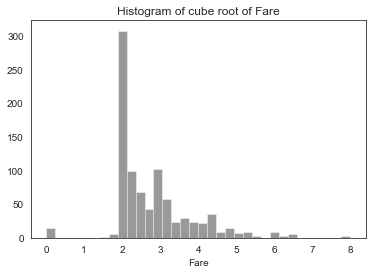

In [43]:
plt.figure(figsize=(6,4))
g = sns.distplot(T['Fare']**(1/3), kde=False, color='black').set_title('Histogram of cube root of Fare')

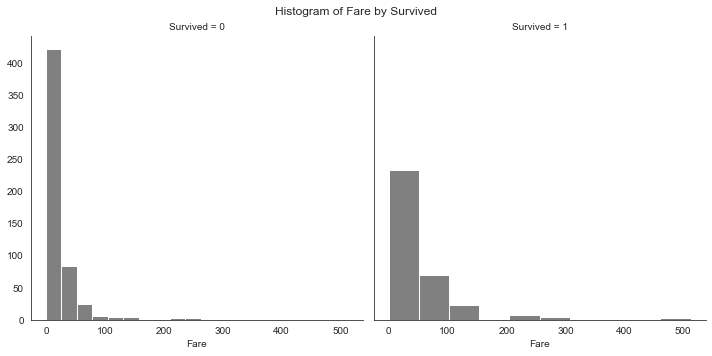

In [44]:
g = sns.FacetGrid(T, col='Survived', col_order=[0, 1], height=5, aspect=1)
g.map(plt.hist, 'Fare', color='grey')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Histogram of Fare by Survived')
plt.show()

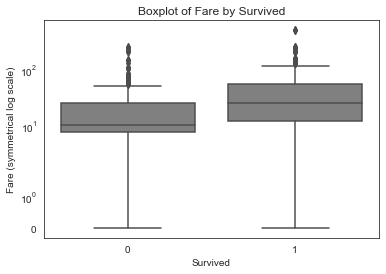

In [45]:
plt.figure(figsize=(6,4))
g = sns.boxplot(x='Survived', y='Fare', data=T, color='grey').set_title('Boxplot of Fare by Survived')
plt.yscale('symlog')
plt.ylabel('Fare (symmetrical log scale)')
plt.show()

Exploration of `SibSp`

In [46]:
T['SibSp'].value_counts(dropna=False).sort_index()

0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

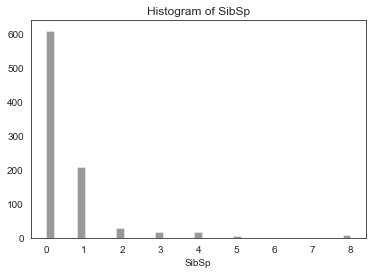

In [47]:
plt.figure(figsize=(6,4))
g = sns.distplot(T['SibSp'], color='black', kde=False).set_title('Histogram of SibSp')

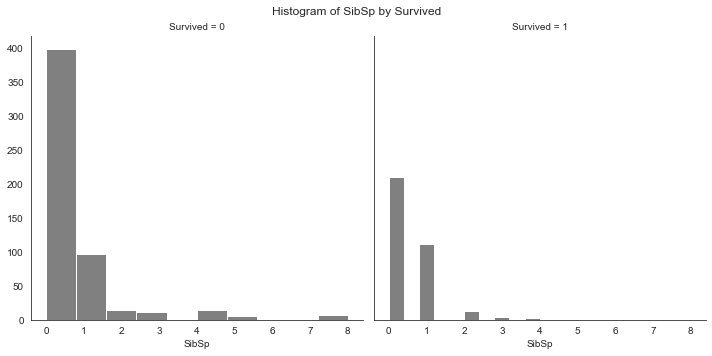

In [48]:
g = sns.FacetGrid(T, col='Survived', col_order=[0, 1], height=5, aspect=1)
g.map(plt.hist, 'SibSp', color='grey')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Histogram of SibSp by Survived')
plt.show()

Exploration of `Parch`

In [49]:
T['Parch'].value_counts(dropna=False).sort_index()

0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

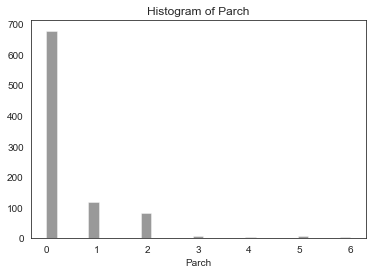

In [50]:
plt.figure(figsize=(6,4))
g = sns.distplot(T['Parch'], color='black', kde=False).set_title('Histogram of Parch')

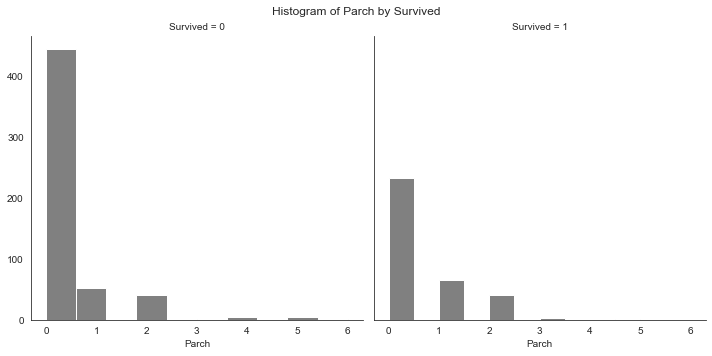

In [51]:
g = sns.FacetGrid(T, col='Survived', col_order=[0, 1], height=5, aspect=1)
g.map(plt.hist, 'Parch', color='grey')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Histogram of Parch by Survived')
plt.show()

Crosstab of `Parch` and `SibSp`

In [52]:
pd.crosstab(columns=T['Parch'], index=T['SibSp'], margins=True)

Parch,0,1,2,3,4,5,6,All
SibSp,,,,,,,,
0,537,38,29,1,1,2,0,608
1,123,57,19,3,3,3,1,209
2,16,7,4,1,0,0,0,28
3,2,7,7,0,0,0,0,16
4,0,9,9,0,0,0,0,18
5,0,0,5,0,0,0,0,5
8,0,0,7,0,0,0,0,7
All,678,118,80,5,4,5,1,891


# Derive new variables

Recoding `Parch` and `SibSp` into a new column called `ParchSibSp`

In [53]:
def derive_ParchSibSp(x):
    if (x['Parch'] == 0 & x['SibSp'] == 0):
        return 0
    elif (x['Parch'] >= 1 & x['SibSp'] == 0):
        return 1
    elif (x['Parch'] == 0 & x['SibSp'] >= 1):
        return 2
    elif (x['Parch'] >= 1 & x['SibSp'] >= 1):
        return 3
    else:
        return None

In [54]:
T['ParchSibSp'] = T.apply(derive_ParchSibSp, axis=1)

In [55]:
S['ParchSibSp'] = S.apply(derive_ParchSibSp, axis=1)

In [56]:
T['ParchSibSp'].value_counts(normalize=True, dropna=False).sort_index()

0    0.76
1    0.12
3    0.12
Name: ParchSibSp, dtype: float64

In [57]:
S['ParchSibSp'].value_counts(normalize=True, dropna=False).sort_index()

0    0.78
1    0.10
3    0.13
Name: ParchSibSp, dtype: float64

Get the deck of a passenger from `Cabin` 

In [58]:
T['Deck'] = T['Cabin'].str.slice(0,1,1)

In [59]:
S['Deck'] = S['Cabin'].str.slice(0,1,1)

In [60]:
pd.set_option('precision', 4)

In [61]:
T['Deck'].value_counts(normalize=True, dropna=False).sort_index()

A      0.0168
B      0.0527
C      0.0662
D      0.0370
E      0.0359
F      0.0146
G      0.0045
T      0.0011
NaN    0.7710
Name: Deck, dtype: float64

In [62]:
S['Deck'].value_counts(normalize=True, dropna=False).sort_index()

A      0.0167
B      0.0431
C      0.0837
D      0.0311
E      0.0215
F      0.0191
G      0.0024
NaN    0.7823
Name: Deck, dtype: float64

In [63]:
pd.set_option('precision', 2)

Get the passenger's title from `Name`   
All the names in the dataset have the format "Surname, Title. Name"

In [64]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

Normalize the titles, returning 'Mr', 'Miss' or 'Mrs'

In [65]:
def replace_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir', 'Master']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady', 'Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title == 'Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

Create a new column for the title

In [66]:
T['Title'] = T['Name'].map(lambda x: get_title(x))

In [67]:
S['Title'] = S['Name'].map(lambda x: get_title(x))

Replace the titles, so the are normalized to 'Mr', 'Miss' and 'Mrs'

In [68]:
T['Title'] = T.apply(replace_titles, axis=1)

In [69]:
S['Title'] = S.apply(replace_titles, axis=1)

In [70]:
T['Title'].value_counts(normalize=True, dropna=False).sort_index()

Miss    0.21
Mr      0.65
Mrs     0.14
Name: Title, dtype: float64

In [71]:
S['Title'].value_counts(normalize=True, dropna=False).sort_index()

Miss    0.19
Mr      0.64
Mrs     0.17
Name: Title, dtype: float64

Check that `Title` is consistent with `Sex`

In [72]:
pd.crosstab(columns=T['Sex'], index=T['Title'], margins=True)

Sex,female,male,All
Title,,,
Miss,185,0,185
Mr,0,577,577
Mrs,129,0,129
All,314,577,891


In [73]:
pd.crosstab(columns=S['Sex'], index=S['Title'], margins=True)

Sex,female,male,All
Title,,,
Miss,79,0,79
Mr,0,266,266
Mrs,73,0,73
All,152,266,418


Looks good!

# Metadata

| Variable name | Variable description                                                               | Is derived | Data type | Number of distinct values in `T.csv` | Percent of missing values in `T.csv` | Number of distinct values in `S.csv` | Percent of missing values in `S.csv` | Measurement | Role     | Exclusion reason         | Notes                          |
|:---------------|:------------------------------------------------------------------------------------|:------------|:-----------|---------------------------------------:|---------------------------------------:|--------------------------------------:|--------------------------------------:|-------------|----------|--------------------------|--------------------------------|
| Survived      | Survival indicator                                                                 | No         | Integer   |                                      2 |                                     0% |                                   N/A |                                   N/A | Binary     | Target   | N/A                      | N/A                            |
| Pclass        | Ticket class. A proxy for socio-economic status (1 = Upper, 2 = Middle, 3 = Lower) | No         | Integer   |                                      3 |                                     0% |                                     3 |                                    0% | Ordinal     | Input    | N/A                      | N/A                           |
| Name          | Passenger name                                                                     | No         | String    |                                    891 |                                     0% |                                   418 |                                    0% | Nominal     | Excluded | Too many distinct values | N/A                            |
| Sex           | Sex                                                                                | No         | String    |                                      2 |                                     0% |                                     2 |                                    0% | Nominal     | Input    | N/A                      | Needs one hot encoding                           |
| Age           | Age in years                                                                       | No         | Float      |                                     88 |                                 19.87% |                                    79 |                                20.57% | Continuous  | Input    | N/A                      | Needs missing value imputation |
| SibSp         | Number of siblings / spouses aboard the Titanic                                    | No         | Integer   |                                      7 |                                     0% |                                     7 |                                    0% | Continuous  | Input    | N/A                      | N/A                            |
| Parch         | Number of parents / children aboard the Titanic                                    | No         | Integer   |                                      7 |                                     0% |                                     8 |                                    0% | Continuous  | Input    | N/A                      | N/A                            |
| Ticket        | Ticket number                                                                      | No         | String    |                                    681 |                                     0% |                                   363 |                                    0% | Nominal     | Excluded | Too many distinct values | N/A                            |
| Fare          | Passenger fare                                                                     | No         | Float      |                                    248 |                                     0% |                                   169 |                                 0.24% | Continuous  | Input    | N/A                      | Needs missing value imputation (for `S.csv` only)                            |
| Cabin         | Cabin number                                                                       | No         | String    |                                    147 |                                 77.10% |                                    76 |                                78.23% | Nominal     | Excluded | Too many distinct values | N/A                            |
| Embarked      | Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)               | No         | String    |                                      3 |                                  0.22% |                                     3 |                                    0% | Nominal     | Input    | N/A                      | Needs missing value imputation (for `T.csv` only) and one hot encoding |
| ParchSibSp    | Combination of Parch and SibSp                                                     | Yes        | Integer   |                                      3 |                                     0% |                                   3  |                                     0% | Nominal     | Input    | N/A                      | N/A                           |
| Deck          | Deck (based on Cabin)                                                              | Yes        | String    |                                      8 |                                 77.10% |                                   7  |                                 78.23% | Ordinal     | Excluded | Too many missing values | N/A        |
| Title         | Passenger title                                                                    | Yes        | String    |                                      3 |                                     0% |                                   3  |                                   0%   | Nominal     | Input    | Input                    | Needs one hot encoding                            |

In [74]:
T.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ParchSibSp,Deck,Title
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0,NaN,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,0,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S,0,NaN,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,0,C,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,0,NaN,Mr


In [75]:
S.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ParchSibSp,Deck,Title
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.83,NaN,Q,0,NaN,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.00,NaN,S,0,NaN,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.69,NaN,Q,0,NaN,Mr
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.66,NaN,S,0,NaN,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.29,NaN,S,3,NaN,Mrs


# Data preparation for modeling

Even tough some models tolerate missing values (e.g. XGBoost), we impute missing values for illustration purpose.  

Impute missing values of `Age` with the mean in `train.csv` and `test.csv`  

In [76]:
age_mean = T['Age'].mean()

In [77]:
def ImputeMissingAgeWithMean(x):
    Age = x['Age']
    if np.isnan(Age):
        return age_mean
    else:
        return Age

In [78]:
T['Age_imp'] = T.apply(ImputeMissingAgeWithMean, axis=1)

In [79]:
T[['Age', 'Age_imp']].describe()

,Age,Age_imp
count,714.00,891.00
mean,29.70,29.70
std,14.53,13.00
min,0.42,0.42
25%,20.12,22.00
50%,28.00,29.70
75%,38.00,35.00
max,80.00,80.00


In [80]:
S['Age_imp'] = S.apply(ImputeMissingAgeWithMean, axis=1)

In [81]:
S[['Age', 'Age_imp']].describe()

,Age,Age_imp
count,332.00,418.00
mean,30.27,30.15
std,14.18,12.64
min,0.17,0.17
25%,21.00,23.00
50%,27.00,29.70
75%,39.00,35.75
max,76.00,76.00


In [82]:
pd.set_option('precision', 1)

In [83]:
T.loc[6:6, ['Age', 'Age_imp']]

,Age,Age_imp
PassengerId,,
6,NaN,29.7


In [84]:
S.loc[902:902, ['Age', 'Age_imp']]

,Age,Age_imp
PassengerId,,
902,NaN,29.7


Alternatively, one could impute missing values of `Age` using the distribution of known values in `train.csv` and `test.csv`. We assume that known values of `Age` are normally distributed.

In [85]:
# age_mean = T['Age'].mean()
# age_std = T['Age'].std()
# age_min = T['Age'].min()
# age_max = T['Age'].max()

In [86]:
# def ImputeMissingAgeWithDist(x):
#     age = x['Age']
#     if np.isnan(age):
#         imputed_age = np.random.normal(age_mean, age_std)
#         if imputed_age < age_min:
#             return age_min
#         elif imputed_age > age_max:
#             return age_max
#         else:
#             return imputed_age
#     else:
#         return age

In [87]:
# T['Age_imp'] = T.apply(ImputeMissingAgeWithDist, axis=1)

In [88]:
# S['Age_imp'] = S.apply(ImputeMissingAgeWithDist, axis=1)

Impute missing values of `Fare` with the mean in `test.csv`

In [89]:
fare_mean = T['Fare'].mean()

In [90]:
def ImputeMissingFare(x):
    Fare = x['Fare']
    if np.isnan(Fare):
        return fare_mean
    else:
        return Fare

In [91]:
S['Fare_imp'] = S.apply(ImputeMissingFare, axis=1)

In [92]:
pd.set_option('precision', 2)

In [93]:
S.loc[1044:1044, ['Fare', 'Fare_imp']]

,Fare,Fare_imp
PassengerId,,
1044,NaN,32.2


Impute missing values of `Embarked` with the mode in `train.csv`

In [94]:
T.loc[62:62, ['Embarked']]

,Embarked
PassengerId,
62,NaN


In [95]:
Embarked_mode = T['Embarked'].mode()[0]

In [96]:
Embarked_mode

'S'

In [97]:
T['Embarked'].fillna(Embarked_mode, inplace = True)

In [98]:
T.loc[62:62, ['Embarked']]

,Embarked
PassengerId,
62,S


In [99]:
y = T['Survived']

In [100]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

Split inputs into categorical and continuous

In [101]:
categorical_inputs = ['Pclass', 'Sex', 'Embarked', 'Title', 'ParchSibSp']
continuous_inputs = ['Age_imp', 'SibSp', 'Parch', 'Fare']

In [102]:
T_categorical = T[categorical_inputs]
T_continuous = T[continuous_inputs]

In [103]:
S_categorical = S[categorical_inputs]
S_continuous = S[continuous_inputs]

One hot encoding of categorical inputs

In [104]:
T_cat_1hot = pd.get_dummies(data=T_categorical, drop_first=False)

In [105]:
T_cat_1hot.head(10)

,Pclass,ParchSibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
PassengerId,,,,,,,,,,
1,3,0,0,1,0,0,1,0,1,0
2,1,0,1,0,1,0,0,0,0,1
3,3,0,1,0,0,0,1,1,0,0
4,1,0,1,0,0,0,1,0,0,1
5,3,0,0,1,0,0,1,0,1,0
6,3,0,0,1,0,1,0,0,1,0
7,1,0,0,1,0,0,1,0,1,0
8,3,3,0,1,0,0,1,0,1,0
9,3,1,1,0,0,0,1,0,0,1


In [106]:
T[categorical_inputs].head(10)

,Pclass,Sex,Embarked,Title,ParchSibSp
PassengerId,,,,,
1,3,male,S,Mr,0
2,1,female,C,Mrs,0
3,3,female,S,Miss,0
4,1,female,S,Mrs,0
5,3,male,S,Mr,0
6,3,male,Q,Mr,0
7,1,male,S,Mr,0
8,3,male,S,Mr,3
9,3,female,S,Mrs,1


In [107]:
S_cat_1hot = pd.get_dummies(data=S_categorical, drop_first=False)

In [108]:
S_cat_1hot.head(10)

,Pclass,ParchSibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
PassengerId,,,,,,,,,,
892,3,0,0,1,0,1,0,0,1,0
893,3,0,1,0,0,0,1,0,0,1
894,2,0,0,1,0,1,0,0,1,0
895,3,0,0,1,0,0,1,0,1,0
896,3,3,1,0,0,0,1,0,0,1
897,3,0,0,1,0,0,1,0,1,0
898,3,0,1,0,0,1,0,1,0,0
899,2,3,0,1,0,0,1,0,1,0
900,3,0,1,0,1,0,0,0,0,1


In [109]:
S[categorical_inputs].head(10)

,Pclass,Sex,Embarked,Title,ParchSibSp
PassengerId,,,,,
892,3,male,Q,Mr,0
893,3,female,S,Mrs,0
894,2,male,Q,Mr,0
895,3,male,S,Mr,0
896,3,female,S,Mrs,3
897,3,male,S,Mr,0
898,3,female,Q,Miss,0
899,2,male,S,Mr,3
900,3,female,C,Mrs,0


In [110]:
X = T_cat_1hot.join(T_continuous)

In [111]:
X.head()

,Pclass,ParchSibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Age_imp,SibSp,Parch,Fare
PassengerId,,,,,,,,,,,,,,
1,3,0,0,1,0,0,1,0,1,0,22.0,1,0,7.25
2,1,0,1,0,1,0,0,0,0,1,38.0,1,0,71.28
3,3,0,1,0,0,0,1,1,0,0,26.0,0,0,7.92
4,1,0,1,0,0,0,1,0,0,1,35.0,1,0,53.10
5,3,0,0,1,0,0,1,0,1,0,35.0,0,0,8.05


In [112]:
X_score = S_cat_1hot.join(S_continuous)

In [113]:
X_score.head()

,Pclass,ParchSibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Age_imp,SibSp,Parch,Fare
PassengerId,,,,,,,,,,,,,,
892,3,0,0,1,0,1,0,0,1,0,34.5,0,0,7.83
893,3,0,1,0,0,0,1,0,0,1,47.0,1,0,7.00
894,2,0,0,1,0,1,0,0,1,0,62.0,0,0,9.69
895,3,0,0,1,0,0,1,0,1,0,27.0,0,0,8.66
896,3,3,1,0,0,0,1,0,0,1,22.0,1,1,12.29


# Data partitioning 

Partition the data into a 80% training partition and a 20% test partition using stratified sampling

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

Get the shape of `X_train`, `X_test`, `y_train`, `y_test`, `X_score`

In [115]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

print(X_score.shape)

(712, 14)
(712,)
(179, 14)
(179,)
(418, 14)


Frequency of `Survived` in the training partition

In [116]:
pd.Series(y_train).value_counts(normalize=True)

0    0.62
1    0.38
Name: Survived, dtype: float64

Frequency of `Survived` in the valiation partition

In [117]:
pd.Series(y_test).value_counts(normalize=True)

0    0.61
1    0.39
Name: Survived, dtype: float64

Get the prior probability from the training partition

In [118]:
prior_proba = pd.Series(y_train).value_counts(normalize=True)[1]

In [119]:
print('Prior probability = {0:.4f}'.format(prior_proba))

Prior probability = 0.3834


# Model fitting

Run `GridSearchCV` for several classifiers

In [120]:
class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=5, n_jobs=-1, verbose=1, scoring=None, refit=False, return_train_score=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=return_train_score)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [121]:
models = {'Extra Trees': ExtraTreesClassifier(random_state=1),
          'Random Forest': RandomForestClassifier(random_state=1),
          'AdaBoost': AdaBoostClassifier(random_state=1, algorithm='SAMME.R'),
          'Gradient Boosting': GradientBoostingClassifier(random_state=1, loss='deviance', criterion='friedman_mse'),
          'SVC': SVC(random_state=1, max_iter=-1),
          'XGBoost': xgb.XGBClassifier(base_score=prior_proba, 
                                       booster='gbtree',
                                       colsample_bylevel=1,
                                       colsample_bynode=1,
                                       importance_type='gain', 
                                       max_delta_step=0, 
                                       missing=None,  
                                       n_estimators=30,  
                                       n_jobs=-1, 
                                       nthread=None,  
                                       objective='binary:logistic', 
                                       random_state=0, 
                                       reg_alpha=0,  
                                       reg_lambda=1,
                                       scale_pos_weight=1,
                                       seed=None,
                                       silent=None, 
                                       subsample=1, 
                                       tree_method='auto')}

params = {'Extra Trees': [{'criterion': ['gini', 'entropy'],
                           'n_estimators': [10, 20, 30],
                           'max_depth' : [3, 4, 5, 6]}],
          'Random Forest': [{'criterion': ['gini', 'entropy'],
                             'n_estimators': [20, 30, 50, 100],
                             'max_depth' : [3, 4, 5, 6]}],
          'AdaBoost': {'n_estimators': [20, 30, 50, 100],
                       'learning_rate':[0.5, 1, 1.5]},
          'Gradient Boosting': {'n_estimators': [50, 100, 150],
                                'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
                                'max_depth' : [3, 4, 5, 6]},
          'SVC': [{'kernel': ['rbf', 'linear', 'sigmoid'],
                   'C': [0.5, 1, 10],
                   'gamma': ['scale', 'auto']}],
          'XGBoost': {'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
                      'max_depth' : [3, 4, 5, 6], 
                      'min_child_weight' : [1, 3, 5, 7],
                      'gamma' : [0.0, 0.1, 0.2, 0.3, 0.4],
                      'colsample_bytree' : [0.3, 0.4, 0.5, 0.7, 1]}}

In [122]:
helper = EstimatorSelectionHelper(models, params)
helper.fit(X_train, y_train, verbose=0, cv=5, refit=True, scoring='roc_auc', n_jobs=-1)

Running GridSearchCV for Extra Trees.
Running GridSearchCV for Random Forest.
Running GridSearchCV for AdaBoost.
Running GridSearchCV for Gradient Boosting.
Running GridSearchCV for SVC.
Running GridSearchCV for XGBoost.


In [123]:
GridSearchSummary = helper.score_summary()

In [124]:
pd.set_option('precision', 4)

In [125]:
GridSearchSummary.head(20)

,estimator,min_score,mean_score,max_score,std_score,criterion,max_depth,n_estimators,learning_rate,C,gamma,kernel,colsample_bytree,min_child_weight
2540,XGBoost,0.8225,0.8777,0.9134,0.03467,NaN,6,NaN,0.25,NaN,0.4,NaN,1,5
1942,XGBoost,0.8376,0.8773,0.9122,0.0272,NaN,5,NaN,0.2,NaN,0.3,NaN,0.7,1
2440,XGBoost,0.8243,0.877,0.9087,0.03329,NaN,5,NaN,0.25,NaN,0.3,NaN,1,5
2364,XGBoost,0.8261,0.8769,0.9111,0.03282,NaN,6,NaN,0.3,NaN,0.2,NaN,1,5
2252,XGBoost,0.8293,0.8768,0.9095,0.03141,NaN,6,NaN,0.25,NaN,0.1,NaN,1,5
2428,XGBoost,0.8303,0.8765,0.9106,0.03189,NaN,6,NaN,0.2,NaN,0.3,NaN,1,5
1880,XGBoost,0.8186,0.8765,0.9175,0.03691,NaN,5,NaN,0.3,NaN,0.2,NaN,0.7,5
1948,XGBoost,0.824,0.8765,0.9122,0.03495,NaN,6,NaN,0.2,NaN,0.3,NaN,0.7,5
2536,XGBoost,0.8228,0.8762,0.9097,0.03265,NaN,5,NaN,0.25,NaN,0.4,NaN,1,5
2412,XGBoost,0.8197,0.8762,0.9135,0.03683,NaN,6,NaN,0.15,NaN,0.3,NaN,1,5


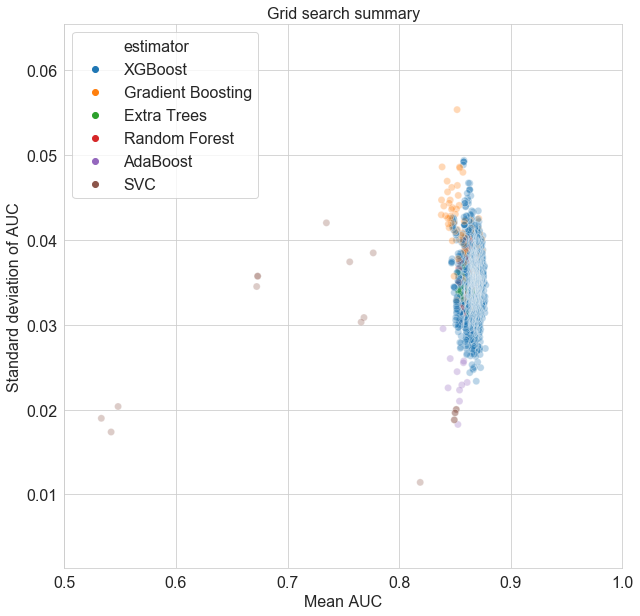

In [126]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.scatterplot(data=GridSearchSummary, x='mean_score', y='std_score', hue='estimator', s=50, alpha=0.3)
plt.legend(loc='best', fontsize=16, title=None)
plt.title('Grid search summary', fontsize=16)
plt.xlim(left=0.5, right=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Mean AUC', fontsize=16)
plt.ylabel('Standard deviation of AUC', fontsize=16)
plt.show()

The table below shows the top 2 models from `GridSearchCV`

In [127]:
GridSearchSummary.iloc[0:2][['estimator', 'min_score', 'mean_score', 'max_score', 'std_score', 'learning_rate', 'gamma', 'colsample_bytree', 'max_depth', 'min_child_weight']]

,estimator,min_score,mean_score,max_score,std_score,learning_rate,gamma,colsample_bytree,max_depth,min_child_weight
2540,XGBoost,0.8225,0.8777,0.9134,0.03467,0.25,0.4,1,6,5
1942,XGBoost,0.8376,0.8773,0.9122,0.0272,0.2,0.3,0.7,5,1


We decide to fit an XGBoost model with the following parameters:  
  
| **Parameter**    | **Value** |
|:-----------------|----------:|
| learning_rate    | 0.2       |
| gamma            | 0.3       |
| colsample_bytree | 0.7       |
| max_depth        | 5         |
| min_child_weight | 1         |

Model fitting using XGBoost via Scikit-Learn API. We use prior probability for parameter `base_score`

In [128]:
model = xgb.XGBClassifier(base_score=prior_proba,
                          booster='gbtree', 
                          colsample_bylevel=1,
                          colsample_bynode=1, 
                          colsample_bytree=0.7, 
                          gamma=0.3,
                          importance_type='gain',
                          learning_rate=0.2,
                          max_delta_step=0, 
                          max_depth=5,
                          min_child_weight=5, 
                          missing=None, 
                          n_estimators=30, 
                          n_jobs=-1,
                          nthread=None, 
                          objective='binary:logistic', 
                          random_state=0,
                          reg_alpha=0, 
                          reg_lambda=1, 
                          scale_pos_weight=1,
                          seed=None,
                          silent=None, 
                          subsample=1, 
                          tree_method='auto',
                          verbosity=1)

Fit the model on training partition

In [129]:
model.fit(X=X_train, y=y_train, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=5, verbose=True)

[0]	validation_0-auc:0.870585	validation_1-auc:0.846706
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.883172	validation_1-auc:0.853228
[2]	validation_0-auc:0.883468	validation_1-auc:0.854809
[3]	validation_0-auc:0.891875	validation_1-auc:0.866337
[4]	validation_0-auc:0.895759	validation_1-auc:0.863571
[5]	validation_0-auc:0.895967	validation_1-auc:0.866271
[6]	validation_0-auc:0.899493	validation_1-auc:0.864888
[7]	validation_0-auc:0.900327	validation_1-auc:0.866667
[8]	validation_0-auc:0.900511	validation_1-auc:0.866996
[9]	validation_0-auc:0.905663	validation_1-auc:0.866733
[10]	validation_0-auc:0.908892	validation_1-auc:0.866535
[11]	validation_0-auc:0.912409	validation_1-auc:0.870422
[12]	validation_0-auc:0.912926	validation_1-auc:0.871937
[13]	validation_0-auc:0.914683	validation_1-auc:0.868248
[14]	validation_0-auc:0.9152	validation_1-auc:0.867325
[

XGBClassifier(base_score=0.38342696629213485, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              gamma=0.3, learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=30, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='auto', verbosity=1)

Get model parameters

In [130]:
model.get_params()

{'base_score': 0.38342696629213485,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'gamma': 0.3,
 'learning_rate': 0.2,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 5,
 'missing': None,
 'n_estimators': 30,
 'n_jobs': -1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1,
 'tree_method': 'auto'}

In [131]:
print('Number of boosting rounds = {}'.format(model.get_num_boosting_rounds()))

Number of boosting rounds = 30


In [132]:
model_last_iter = len(model.evals_result()['validation_0']['auc'])
print('Last iteration = {}'.format(model_last_iter))

Last iteration = 17


In [133]:
print('Best iteration = {}'.format(model.best_ntree_limit - 1))

Best iteration = 12


Get the AUC score by partition for the best iteration

In [134]:
pd.set_option('precision', 4)

In [135]:
AUC = pd.concat([pd.DataFrame.from_dict(data=model.evals_result()['validation_0'], orient='columns'),
                 pd.DataFrame.from_dict(data=model.evals_result()['validation_1'], orient='columns')], axis=1)

AUC.columns = ['Training AUC', 'Validation AUC']
AUC.index.name = 'Iteration'

In [136]:
AUC

,Training AUC,Validation AUC
Iteration,,
0,0.8706,0.8467
1,0.8832,0.8532
2,0.8835,0.8548
3,0.8919,0.8663
4,0.8958,0.8636
5,0.8960,0.8663
6,0.8995,0.8649
7,0.9003,0.8667
8,0.9005,0.8670


Best iteration

In [137]:
AUC.iloc[model.best_ntree_limit - 1]

Training AUC      0.9129
Validation AUC    0.8719
Name: 12, dtype: float64

Plot the AUC scores by partition

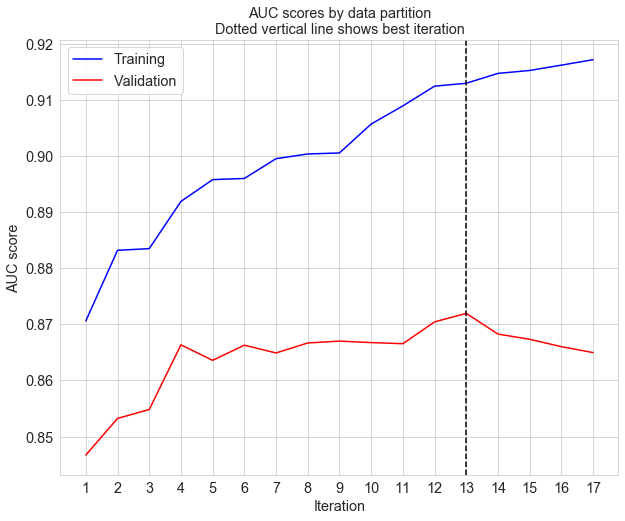

In [138]:
plt.figure(figsize=(10, 8))
plt.title("AUC scores by data partition\nDotted vertical line shows best iteration", fontsize='x-large')
plt.plot(np.arange(1,model_last_iter+1), model.evals_result()['validation_0']['auc'], color="b", linestyle="-", label="Training")
plt.plot(np.arange(1,model_last_iter+1), model.evals_result()['validation_1']['auc'], color="r", linestyle="-", label="Validation")
plt.ylabel("AUC score", fontsize='x-large')
plt.xlabel("Iteration", fontsize='x-large')
plt.xticks((np.arange(model_last_iter)+1), fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.legend(loc='best', frameon=True, fontsize='x-large')
plt.grid(True)
plt.axvline(x=model.best_ntree_limit, color='black', linestyle='--')
plt.show()

Plot ROC curve for the training and validation partition

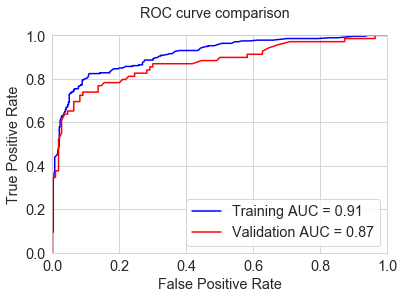

In [139]:
auc_train = plot_roc_curve(model, X_train, y_train, color='blue', label='Training AUC = '+str(AUC.iloc[model.best_ntree_limit - 1][0].round(2)))
auc_test = plot_roc_curve(model, X_test, y_test, color='red', label='Validation AUC = '+str(AUC.iloc[model.best_ntree_limit - 1][1].round(2)), ax=auc_train.ax_)
auc_test.figure_.suptitle("ROC curve comparison", fontsize='x-large')
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xlabel('False Positive Rate', fontsize='x-large')
plt.ylabel('True Positive Rate', fontsize='x-large')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc='lower right', frameon=True, fontsize='x-large')
plt.show()

Display the tree

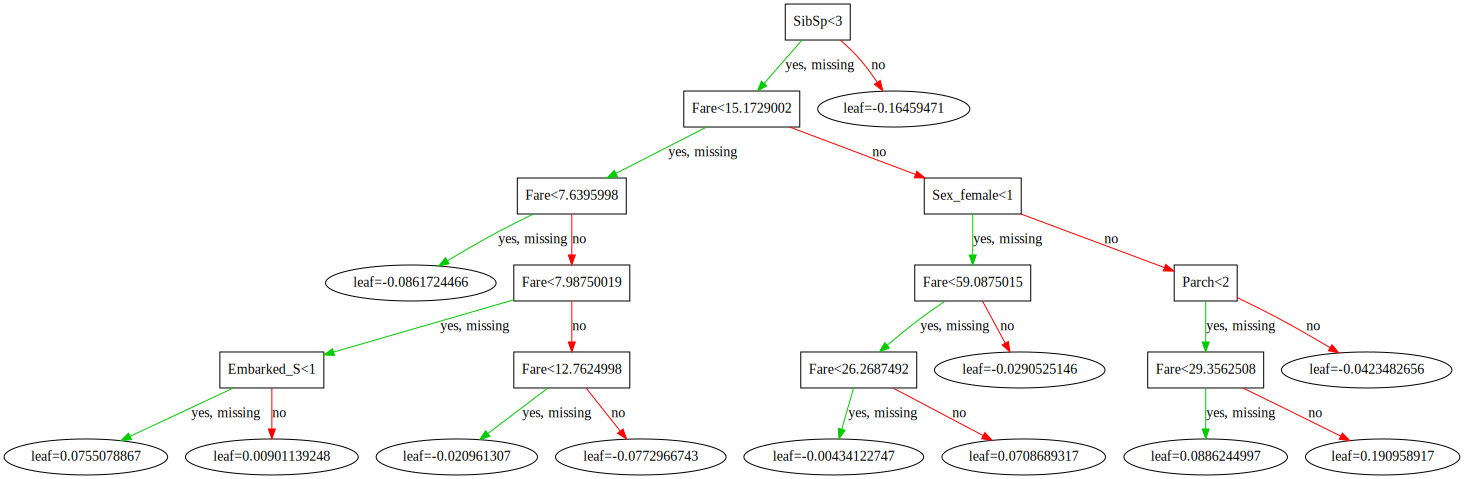

In [140]:
xgb.to_graphviz(model, num_trees=model.best_ntree_limit, yes_color='#00cc00', no_color='#FF0000', condition_node_params={'shape': 'box', 'style': 'solid'})

Plot feature importance

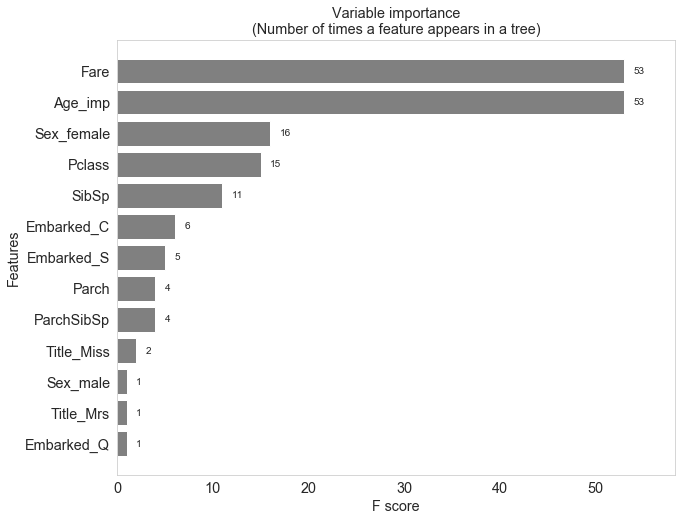

In [141]:
plt.rcParams["figure.figsize"] = (10, 8)
g = xgb.plot_importance(model.get_booster(), grid=False, height=0.8, color='grey', importance_type='weight')
plt.ylabel('Features', fontsize='x-large')
plt.xlabel('F score', fontsize='x-large')
plt.title('Variable importance\n(Number of times a feature appears in a tree)', fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xticks(fontsize='x-large')
plt.show()

Get predicted probabilities for the training and the validation partition

In [142]:
y_train_scores_0_1 = model.predict_proba(X_train, ntree_limit=model.best_ntree_limit)
y_test_scores_0_1 = model.predict_proba(X_test, ntree_limit=model.best_ntree_limit)

In [143]:
type(y_train_scores_0_1)

numpy.ndarray

In [144]:
print(y_train_scores_0_1.shape)
print(y_test_scores_0_1.shape)

(712, 2)
(179, 2)


Predicted probabilities for each class of `Survived` for the first 5 passengers in the training partition

In [145]:
y_train_scores_0_1[0:5]

array([[0.25741738, 0.7425826 ],
       [0.7287748 , 0.27122524],
       [0.42987794, 0.57012206],
       [0.89303243, 0.10696755],
       [0.09623843, 0.90376157]], dtype=float32)

Predicted probabilities for each class of `Survived` for the first 5 passengers in the validation partition

In [146]:
y_test_scores_0_1[0:5]

array([[0.8888402 , 0.11115977],
       [0.65571445, 0.34428555],
       [0.9042434 , 0.09575657],
       [0.80756503, 0.19243497],
       [0.8950008 , 0.10499918]], dtype=float32)

Get the probability of `Survived` = 1

In [147]:
y_train_scores = y_train_scores_0_1[:,1]
y_test_scores = y_test_scores_0_1[:,1]

Create a dataframe of predictred probabilities of `Survived` = 1 by combining `y_train_scores` array and `y_test_scores` array

In [148]:
y_train_scores_df = pd.DataFrame(y_train_scores, index=X_train.index, columns=['Probability of Survived = 1'])
y_train_scores_df['Partition'] = 'Training'

y_test_scores_df = pd.DataFrame(y_test_scores, index=X_test.index, columns=['Probability of Survived = 1'])
y_test_scores_df['Partition'] = 'Validation'

y_scores = pd.concat([y_train_scores_df, y_test_scores_df]).sort_index()

Descriptive statistics of predictred probabilities of `Survived` = 1 by partition

In [149]:
y_scores.groupby(['Partition']).describe()

Probability of Survived = 1                                  \
                                 count    mean     std     min     25%   
Partition                                                                
Training                         712.0  0.3829  0.2929  0.0672  0.1257   
Validation                       179.0  0.3854  0.3015  0.0804  0.1181   

                                   
               50%     75%    max  
Partition                          
Training    0.2550  0.6455  0.920  
Validation  0.2351  0.7208  0.913

Histogram of predicted probability of `Survived` = 1 by partition

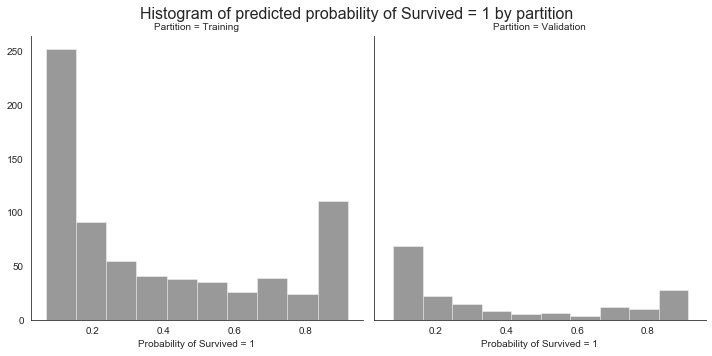

In [150]:
sns.set_style("white")
g = sns.FacetGrid(y_scores, col='Partition', col_order=['Training', 'Validation'], height=5, aspect=1, margin_titles=True)
g.map(sns.distplot, 'Probability of Survived = 1', kde=False, bins=10, color='black')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Histogram of predicted probability of Survived = 1 by partition', fontsize=16)
plt.show()

Cumulative distribution function of predicted probability of `Survived` = 1 by partition

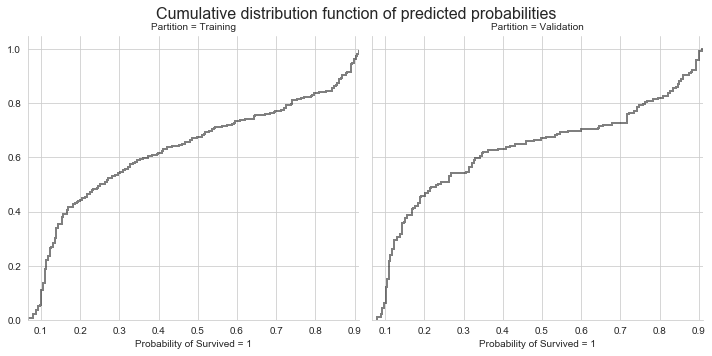

In [151]:
sns.set_style("whitegrid")
g = sns.FacetGrid(y_scores, col='Partition', col_order=['Training', 'Validation'], height=5, aspect=1, margin_titles=True, xlim=(y_scores['Probability of Survived = 1'].min(), y_scores['Probability of Survived = 1'].max()-0.008))
g.map(plt.hist, 'Probability of Survived = 1', cumulative=True, histtype='step', density=1, alpha=0.5, linewidth=2, bins=200, color='black')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Cumulative distribution function of predicted probabilities', fontsize=16)
plt.show()

# Choosing a decision threshold (aka score cutoff)

Testing different thresholds of predicted probabilities using the training dataset.  
Define a macro that will be used to generate predictions from probabilities.

In [152]:
def adjusted_classes(y_train_scores, t):
    """
    Adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_train_scores]

In [153]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Test all threshods from 0 to 1 by 0.001 and calculate classification metrics

In [154]:
df = pd.DataFrame(columns=['Threshold', 'TN', 'FP', 'FN', 'TP', 'Precision', 'Recall', 'Accuracy', 'F1', 'Jaccard score','Hamming loss', 'Hinge loss'], dtype='float')

In [155]:
for i in np.arange(0, 1000, 1):
    threshold = float('0.'+str(i).zfill(3))
    pred = adjusted_classes(y_train_scores, threshold)
    df.loc[i] = {'Threshold' : threshold,
                 'TN' : confusion_matrix(y_train, pred).ravel()[0],
                 'FP' : confusion_matrix(y_train, pred).ravel()[1],
                 'FN' : confusion_matrix(y_train, pred).ravel()[2],
                 'TP' : confusion_matrix(y_train, pred).ravel()[3],
                 'Precision' : precision_score(y_train, pred, pos_label=1, average='binary', zero_division=0),
                 'Recall' : recall_score(y_train, pred, pos_label=1, average='binary'),
                 'Accuracy' : accuracy_score(y_train, pred),
                 'F1' : f1_score(y_train, pred, pos_label=1, average='binary'),
                 'Jaccard score' : jaccard_score(y_train, pred, pos_label=1, average='binary'),
                 'Hamming loss': hamming_loss(y_train, pred),
                 'Hinge loss': hinge_loss(y_train, pred)
                 }    

In [156]:
df['Threshold'] = df['Threshold'].astype(str).apply('{:0<5}'.format)
df['TN'] = df['TN'].astype(int)
df['FP'] = df['FP'].astype(int)
df['FN'] = df['FN'].astype(int)
df['TP'] = df['TP'].astype(int)
df['Absolute difference between precision and recall'] = abs(df['Precision'] - df['Recall'])

In [157]:
y_train_scores_min = str(np.round(y_train_scores.min(), 3))
y_train_scores_max = str(np.round(y_train_scores.max(), 3))

Limit results between min/max predicted probabilities

In [158]:
df = df.loc[(df['Threshold'] >= y_train_scores_min) & (df['Threshold'] <= y_train_scores_max)]

Check results when threshold is set to 0.5

In [159]:
df.loc[df['Threshold'] == '0.500']

,Threshold,TN,FP,FN,TP,Precision,Recall,Accuracy,F1,Jaccard score,Hamming loss,Hinge loss,Absolute difference between precision and recall
500,0.500,411,28,69,204,0.879,0.747,0.864,0.808,0.678,0.136,0.753,0.132


Check results when threshold is set to the training prior

In [160]:
df.loc[df['Threshold'] == str(np.round(prior_proba, 3))]

,Threshold,TN,FP,FN,TP,Precision,Recall,Accuracy,F1,Jaccard score,Hamming loss,Hinge loss,Absolute difference between precision and recall
383,0.383,382,57,48,225,0.798,0.824,0.853,0.811,0.682,0.147,0.764,0.026


Find the threshold which maximises accuracy score

In [161]:
pd.DataFrame(df.sort_values(['Accuracy', 'Threshold'], ascending=(False, True)).iloc[0]).T

,Threshold,TN,FP,FN,TP,Precision,Recall,Accuracy,F1,Jaccard score,Hamming loss,Hinge loss,Absolute difference between precision and recall
437,0.437,400,39,56,217,0.848,0.795,0.867,0.820,0.696,0.133,0.750,0.053


Find the threshold that minimises Hamming loss

In [162]:
pd.DataFrame(df.sort_values(['Hamming loss', 'Threshold'], ascending=(True, True)).iloc[0]).T

,Threshold,TN,FP,FN,TP,Precision,Recall,Accuracy,F1,Jaccard score,Hamming loss,Hinge loss,Absolute difference between precision and recall
437,0.437,400,39,56,217,0.848,0.795,0.867,0.820,0.696,0.133,0.750,0.053


Find the threshold that minimises hinge loss

In [163]:
pd.DataFrame(df.sort_values(['Hinge loss', 'Threshold'], ascending=(True, True)).iloc[0]).T

,Threshold,TN,FP,FN,TP,Precision,Recall,Accuracy,F1,Jaccard score,Hamming loss,Hinge loss,Absolute difference between precision and recall
437,0.437,400,39,56,217,0.848,0.795,0.867,0.820,0.696,0.133,0.750,0.053


Find the threshold that maximises F1 score

In [164]:
pd.DataFrame(df.sort_values(['F1', 'Threshold'], ascending=(False, True)).iloc[0]).T

,Threshold,TN,FP,FN,TP,Precision,Recall,Accuracy,F1,Jaccard score,Hamming loss,Hinge loss,Absolute difference between precision and recall
401,0.401,391,48,48,225,0.824,0.824,0.865,0.824,0.701,0.135,0.751,0.000


Find the threshold that maximises the Jaccard score

In [165]:
pd.DataFrame(df.sort_values(['Jaccard score', 'Threshold'], ascending=(False, True)).iloc[0]).T

,Threshold,TN,FP,FN,TP,Precision,Recall,Accuracy,F1,Jaccard score,Hamming loss,Hinge loss,Absolute difference between precision and recall
401,0.401,391,48,48,225,0.824,0.824,0.865,0.824,0.701,0.135,0.751,0.000


Find the threshold that minimises the absolute difference between precision and recall

In [166]:
pd.DataFrame(df.sort_values(['Absolute difference between precision and recall', 'Threshold'], ascending=(True, True)).iloc[0]).T

,Threshold,TN,FP,FN,TP,Precision,Recall,Accuracy,F1,Jaccard score,Hamming loss,Hinge loss,Absolute difference between precision and recall
401,0.401,391,48,48,225,0.824,0.824,0.865,0.824,0.701,0.135,0.751,0.000


Plot true negatives, true positives, false negatives and false positives for each threshold

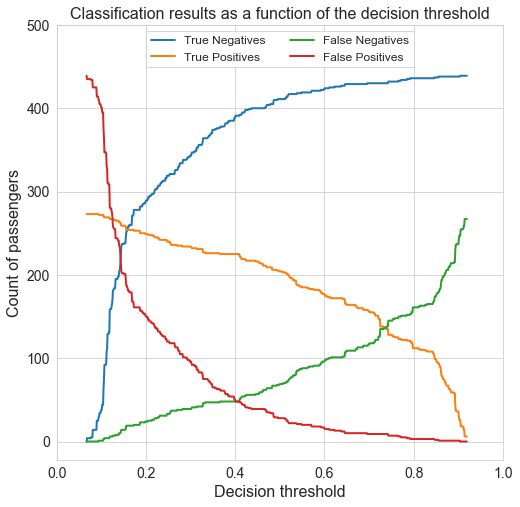

In [167]:
plt.figure(figsize=(8, 8))
plt.plot(df['Threshold'].astype(float), df['TN'], label='True Negatives', linewidth=2)
plt.plot(df['Threshold'].astype(float), df['TP'], label='True Positives', linewidth=2)
plt.plot(df['Threshold'].astype(float), df['FN'], label='False Negatives', linewidth=2)
plt.plot(df['Threshold'].astype(float), df['FP'], label='False Positives', linewidth=2)
plt.title('Classification results as a function of the decision threshold', fontsize=16)
plt.ylabel("Count of passengers", fontsize=16)
plt.xlabel("Decision threshold", fontsize=16)
plt.ylim(top=500)
plt.xlim(0, 1)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid(True)
plt.legend(loc='upper center', fontsize=12, ncol=2, mode=None)
plt.show()

Plot precision and recall scores for each threshold

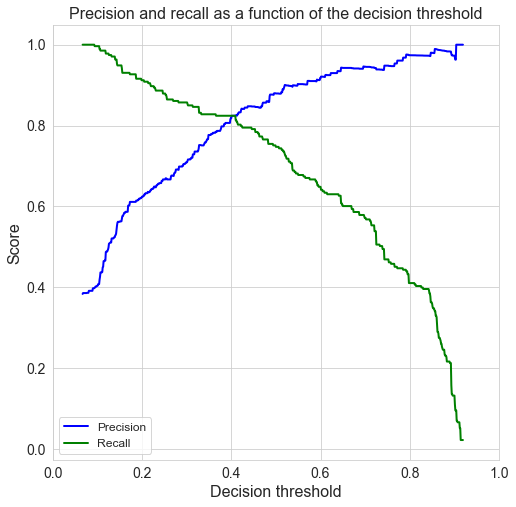

In [168]:
plt.figure(figsize=(8, 8))
plt.plot(df['Threshold'].astype(float), df['Precision'], color='Blue', label='Precision', linewidth=2)
plt.plot(df['Threshold'].astype(float), df['Recall'], color='Green', label='Recall', linewidth=2)
plt.title('Precision and recall as a function of the decision threshold', fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.xlabel("Decision threshold", fontsize=16)
plt.xlim(0, 1)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)  
plt.grid(True)
plt.legend(loc='best', fontsize=12, ncol=1, mode=None)
plt.show()

Plot accuracy score for each threshold

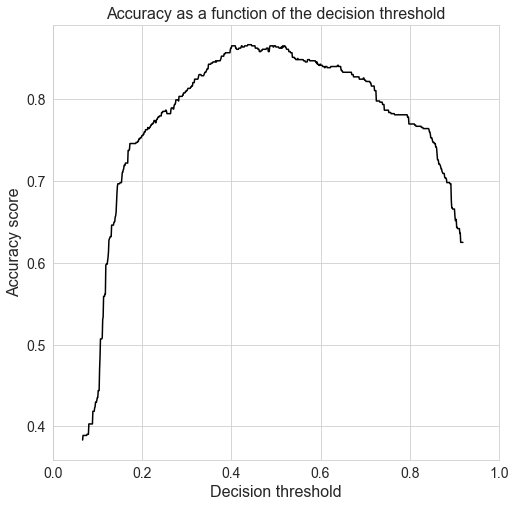

In [169]:
plt.figure(figsize=(8, 8))
plt.plot(df['Threshold'].astype(float), df['Accuracy'], color='black')
plt.title('Accuracy as a function of the decision threshold', fontsize=16)
plt.ylabel("Accuracy score", fontsize=16)
plt.xlabel("Decision threshold", fontsize=16)
plt.xlim(0, 1)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)  
plt.grid(True)
plt.show()

Plot F1 score for each threshold

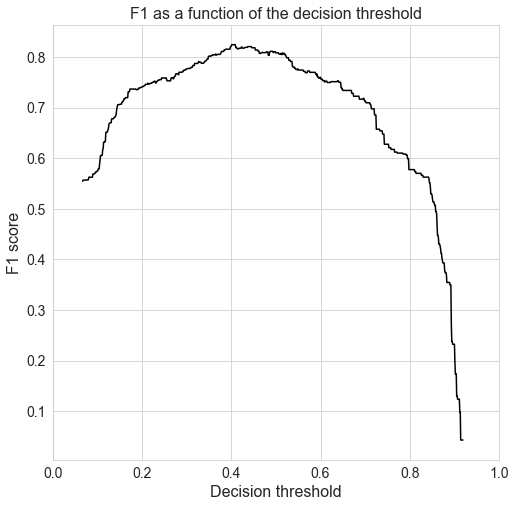

In [170]:
plt.figure(figsize=(8, 8))
plt.plot(df['Threshold'].astype(float), df['F1'], color='black')
plt.title('F1 as a function of the decision threshold', fontsize=16)
plt.ylabel("F1 score", fontsize=16)
plt.xlabel("Decision threshold", fontsize=16)
plt.xlim(0, 1)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)  
plt.grid(True)
plt.show()

Plot Jaccard score for each threshold

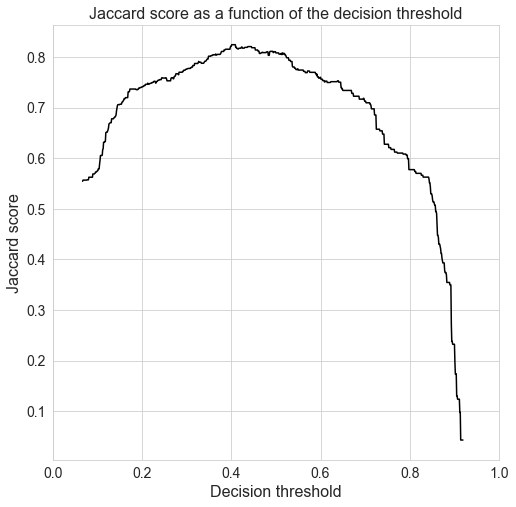

In [171]:
plt.figure(figsize=(8, 8))
plt.plot(df['Threshold'].astype(float), df['F1'], color='black')
plt.title('Jaccard score as a function of the decision threshold', fontsize=16)
plt.ylabel("Jaccard score", fontsize=16)
plt.xlabel("Decision threshold", fontsize=16)
plt.xlim(0, 1)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)  
plt.grid(True)
plt.show()

Define functions to be used later for classification assessment

In [172]:
def precision_recall_threshold(y_true, y_scores, precisions, recalls, thresholds, t):
    """
    Plots the precision recall curve and shows the current value for each
    at the classifier's threshold (t).
    """
    # Generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    
    y_pred = adjusted_classes(y_scores, t)
    
    print('\n')
    print('Decision threshold = {0:.4f}'.format(t))
    
    print('\n')
    print(pd.DataFrame(confusion_matrix(y_true, y_pred), 
                       columns=['Predicted Survived = 0', 'Predicted Survived = 1'],
                       index=['Actual Survived = 0', 'Actual Survived = 1']))
    
    print('\n')
    print(classification_report(y_true=y_true, y_pred=y_pred, digits=4))
    
    print('\n')
    print("Precision = {0:.4f}".format(precision_score(y_true, y_pred, pos_label=1, average='binary')))
    print("Recall = {0:.4f}".format(recall_score(y_true, y_pred, pos_label=1, average='binary')))
    print("Accuracy = {0:.4f}".format(accuracy_score(y_true, y_pred)))
    print("F1 score = {0:.4f}".format(f1_score(y_true, y_pred, pos_label=1, average='binary')))
    
    print('\n')
    
    recall_at_threshold = recalls[np.argmin(thresholds <= t)]
    precision_at_threshold = precisions[np.argmin(thresholds <= t)]
    
    print('Threshold', np.round(t, 4), 'achieves', np.round(recall_at_threshold, 4), 'recall and', np.round(precision_at_threshold, 4), 'precision')
    print('\n')
    
    # Plot the curve
    plt.figure(figsize=(8,8))
    plt.title('Precision and recall curve\nCurrent threshold set at '+str(np.round(t, 3)), fontsize=16)
    plt.plot(recalls, precisions, color='black', linestyle='-', linewidth=2)
    plt.grid(True)
    plt.ylim(top=1.05)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.xlim(0, 1)
    plt.xlabel('Recall', fontsize=16)
    plt.ylabel('Precision', fontsize=16)
    
    # Plot the current threshold on the line
    plt.plot([recall_at_threshold, 0], [precision_at_threshold, precision_at_threshold], "r:")                            
    plt.plot([recall_at_threshold, recall_at_threshold], [0, precision_at_threshold], "r:")
    plt.plot([recall_at_threshold], [precision_at_threshold], "ro")                                         
    
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, t):
    """
    Plots precision and recall scores as a function of the decision threshold
    """
    recall_at_threshold = recalls[np.argmin(thresholds <= t)]
    precision_at_threshold = precisions[np.argmin(thresholds <= t)]
    
    print('Threshold', np.round(t, 4), 'achieves', np.round(recall_at_threshold, 4), 'recall and', np.round(precision_at_threshold, 4), 'precision')
    print('\n')
    
    plt.figure(figsize=(8, 8))
    plt.title("Precision and recall scores as a function of the decision threshold\nCurrent threshold set at "+str(np.round(t, 3)), fontsize=16)
    plt.plot(thresholds, precisions[:-1], color="blue", linestyle="-", linewidth=2, label="Precision")
    plt.plot(thresholds, recalls[:-1], color="green", linestyle="-", linewidth=2, label="Recall")
    plt.ylabel("Score", fontsize=16)
    plt.xlabel("Decision Threshold", fontsize=16)
    plt.ylim(top=1.05)
    plt.xlim(0, 1)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)  
    plt.grid(True)
    plt.legend(loc='best', fontsize=16)
    plt.plot([t, t], [0., recall_at_threshold], "r:")
    plt.plot([0, t], [precision_at_threshold, precision_at_threshold], "r:")                            
    plt.plot([0, t], [recall_at_threshold, recall_at_threshold], "r:")
    plt.plot([t], [precision_at_threshold], "ro")                                         
    plt.plot([t], [recall_at_threshold], "ro")                             
    

Compute precision and recall for each decision threshold using the training partition

In [173]:
p_train, r_train, thresholds_train = precision_recall_curve(y_train, y_train_scores)

Compute classification metrics using prior probability from the training partition  
Plot precision and recall curve for each decision threshold using the training partition  
We use the decision threshold which maximises F1 score on the training partition (0.401)



Decision threshold = 0.4010


                     Predicted Survived = 0  Predicted Survived = 1
Actual Survived = 0                     391                      48
Actual Survived = 1                      48                     225


              precision    recall  f1-score   support

           0     0.8907    0.8907    0.8907       439
           1     0.8242    0.8242    0.8242       273

    accuracy                         0.8652       712
   macro avg     0.8574    0.8574    0.8574       712
weighted avg     0.8652    0.8652    0.8652       712



Precision = 0.8242
Recall = 0.8242
Accuracy = 0.8652
F1 score = 0.8242


Threshold 0.401 achieves 0.8242 recall and 0.8242 precision




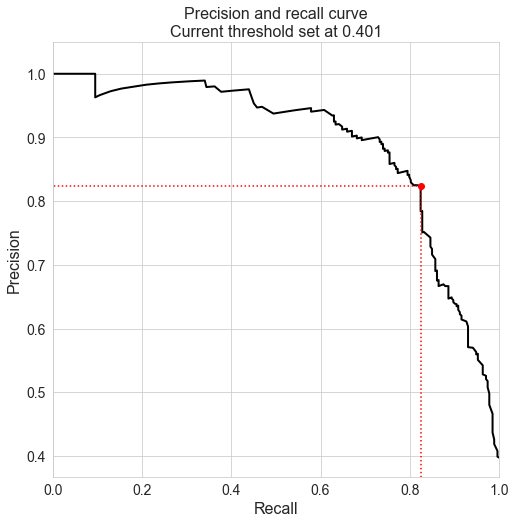

In [174]:
precision_recall_threshold(y_train, y_train_scores, p_train, r_train, thresholds_train, t=0.401)

Threshold 0.401 achieves 0.8242 recall and 0.8242 precision




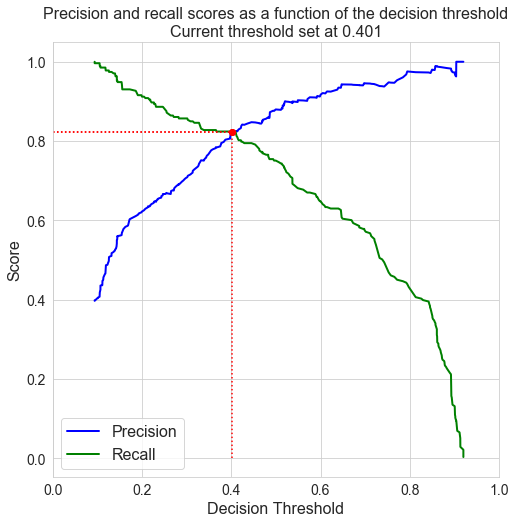

In [175]:
plot_precision_recall_vs_threshold(p_train, r_train, thresholds_train, t=0.401)

Measure performance on the validation partition using the decision threshold which maximises F1 score in the training partition (0.401)

In [176]:
p_test, r_test, thresholds_test = precision_recall_curve(y_test, y_test_scores)



Decision threshold = 0.4010


                     Predicted Survived = 0  Predicted Survived = 1
Actual Survived = 0                      95                      15
Actual Survived = 1                      18                      51


              precision    recall  f1-score   support

           0     0.8407    0.8636    0.8520       110
           1     0.7727    0.7391    0.7556        69

    accuracy                         0.8156       179
   macro avg     0.8067    0.8014    0.8038       179
weighted avg     0.8145    0.8156    0.8148       179



Precision = 0.7727
Recall = 0.7391
Accuracy = 0.8156
F1 score = 0.7556


Threshold 0.401 achieves 0.7391 recall and 0.7727 precision




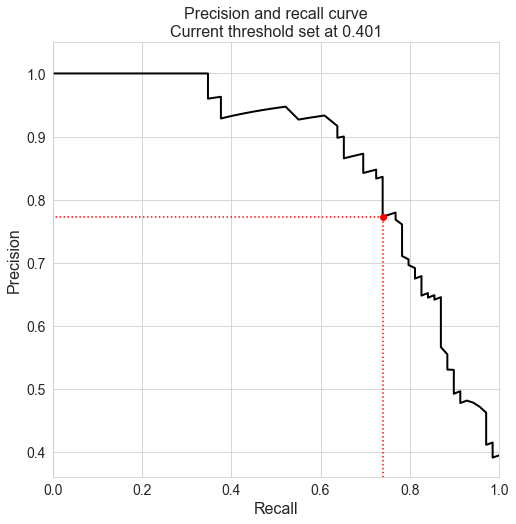

In [177]:
precision_recall_threshold(y_test, y_test_scores, p_test, r_test, thresholds_test, t=0.401)

Threshold 0.401 achieves 0.7391 recall and 0.7727 precision




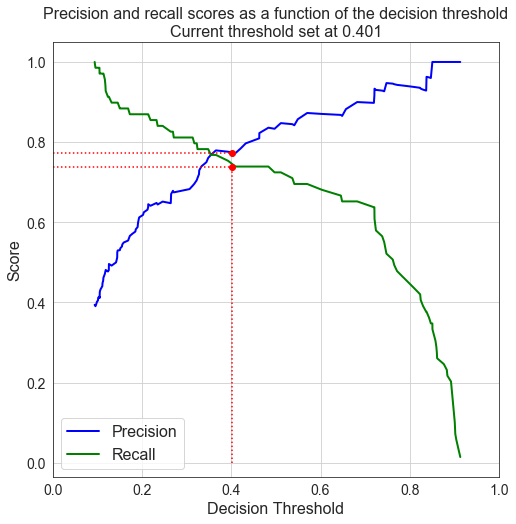

In [187]:
plot_precision_recall_vs_threshold(p_test, r_test, thresholds_test, t=0.401)

# Score the test dataset

In [178]:
y_score_0_1 = model.predict_proba(X_score, ntree_limit=model.best_ntree_limit)

In [179]:
y_score = y_score_0_1[:,1]

Create a dataframe of predictred probabilities of `Survived` = 1 for the test dataset

In [180]:
y_score_df = pd.DataFrame(y_score, index=X_score.index, columns=['Probability of Survived = 1'])

Descriptive statistics of predictred probabilities of `Survived` = 1 by partition

In [181]:
y_score_df.describe()

,Probability of Survived = 1
count,418.000
mean,0.393
std,0.297
min,0.077
25%,0.124
50%,0.264
75%,0.718
max,0.920


Histogram of predicted probability of `Survived` = 1

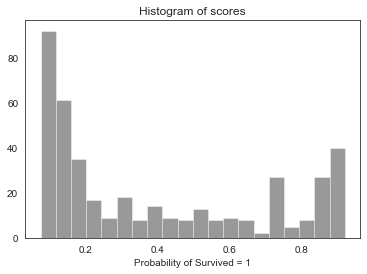

In [182]:
sns.set_style('white')
plt.figure(figsize=(6,4))
g = sns.distplot(y_score_df['Probability of Survived = 1'], bins=20, kde=False, color='black').set_title('Histogram of scores')

Cumulative distribution function of predicted probability of `Survived` = 1

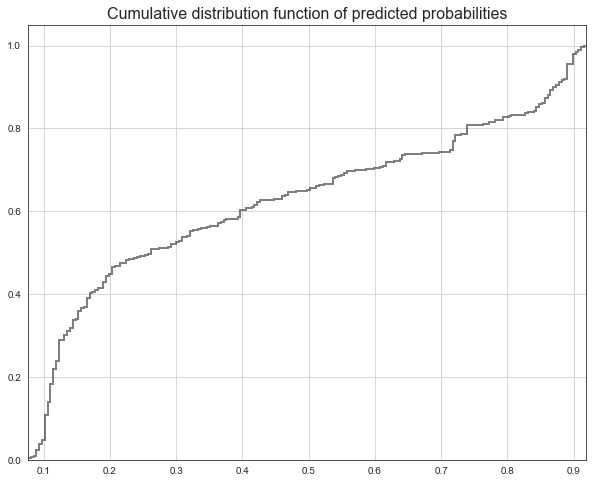

In [183]:
plt.hist(y_score_df['Probability of Survived = 1'], cumulative=True, histtype='step', density=1, alpha=0.5, linewidth=2, bins=200, color='black')
plt.title('Cumulative distribution function of predicted probabilities', fontsize=16)
plt.xlim(y_score_df['Probability of Survived = 1'].min(), y_score_df['Probability of Survived = 1'].max()-0.001)
plt.grid(True)
plt.show()

Generate predicted class on the score dataset using the decision threshold which minimises F1 score on the training partition (0.401)

In [184]:
y_score_df['Survived'] = adjusted_classes(y_score, t=0.401)

In [185]:
y_score_df.head()

,Probability of Survived = 1,Survived
PassengerId,,
892,0.098,0
893,0.502,1
894,0.118,0
895,0.132,0
896,0.420,1


In [186]:
y_score_df['Survived'].to_csv('my_submission.csv', index=True, sep=',')